PLAN TO DO:
1) implement QPSK using GRAY

In [352]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.interpolate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import gray_codes as gray
import sympy as sy


Задаем число поднесущих

In [353]:
N = 4  # OFDM Sub Carriers
T = 1 # Period
k = 2 # nubmer of bits
Fn = 1000


generate random sequence

In [354]:
bits = np.random.binomial(n=1, p=0.5, size=(N*k))
print(bits)

[1 0 1 1 1 0 1 0]


slice sequence by k 

In [355]:
bits_slices = list()
for i in range(0,N):
    a = bits[k*i:k*i+k]
    bits_slices.append(''.join(map(str,a)))
print(bits_slices)

gray_codes_slices = list()
for item in bits_slices:
    gray_codes_slices.append(gray.convert_bin_to_gray(item))

print(gray_codes_slices)

['10', '11', '10', '10']
['11', '10', '11', '11']


signal function

In [356]:
def sig(t, bits):
   sum = 0.0
   for i in range(0, N ):
      Mb_i = int(bits[i],2)
      # a = int(bits[i][0])
      # b =int(bits[i][1])
      # sum += a*np.sin(2*np.pi*(Fn + (i/T))*t ) + b*np.cos(2*np.pi*(Fn + (i/T))*t ) 
      sum += np.sin(2*np.pi*(Fn + (i/T))*t + Mb_i*np.pi/2) 
   return sum

[-3.0, 2.334819269775994, -1.351282239868211, 0.2756769577986875, 0.6443518657145149, -1.2090612629566904, 1.3235211974271441, -1.024458669761138, 0.4681758141104243, 0.1174750146364048, -0.5029361691334573, 0.5275639792754502, -0.14949825570535147, -0.5405573966401156, 1.3460107358151114, -2.023504926346976, 2.356552689086891, -2.2213337930898116, 1.6247816151907497, -0.7036426071713185, -0.31485288464825656, 1.1784479339463396, -1.6814848127983109, 1.7212881444467887, -1.3230323679388007, 0.6268234564246401, 0.1576251795115231, -0.8137173345628669, 1.1784479339459768, -1.1826203628818825, 0.8600203577630232, -0.32507420917131313, -0.2714779687275406, 0.7928897241519979, -1.1557374481108447, 1.3460107358142044, -1.4083248748742432, 1.4141647092293985, -1.4222918450873991, 1.4469196552295474, -1.4461879502988464, 1.3359432923453094, -1.0244586697613272, 0.4557537191908242, 0.3546017019829007, -1.305503958652475, 2.2255327821660176, -2.9149452048069806, 3.202586748012071, -3.00000000000

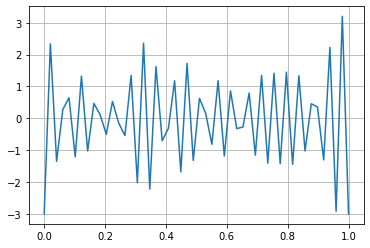

In [357]:
time = np.linspace(0,1)
signal = list()
for t in time:
    signal.append(sig(t,gray_codes_slices))
print(signal)
plt.grid(True)
plt.plot(time, signal)
plt.show()

# f = np.fft.ifft(signal)
# print(f)
# plt.plot(time, f)
# plt.show()
# s = np.fft.fft(f)
# plt.plot(time, s)

In [358]:
# Q = 1.2
# delta = 0.0001
# a = np.ones((N,N))
# for i in range(0,  math.floor(Q*(N))):
#     for j in range(0, N):
#         a[i][j] = np.sin(2*np.pi*(Fn + j/T)*(delta + i/(N*Q))   )
# print("A=",a)

# b = list()
# for i in range(0, math.floor(Q*(N))):
#         b.append(sig(delta + i/(N*Q), gray_codes_slices))
# print("B=",b)

# res = np.linalg.solve(a,b)
# print("X=",res)


newa = np.ones((k*N, k*N))

newb = []
start=0
num=N*k
step = 1/num
time=np.arange(0,num)*step+start
print(time)


for i in range(0,N*k):
        for j in range(0,N):
                newa[i][2*j] =  np.sin(2*np.pi*(Fn + (j/T))*(time[i]+0.0001) ) 
                newa[i][2*j+1] = np.cos(2*np.pi*(Fn + (j/T))*(time[i]+0.0001) ) 

for i in range(0,N*k):
        newb.append(sig((time[i]+0.0001),gray_codes_slices))

res = np.linalg.solve(newa,newb)

print(res)

print(gray_codes_slices)

print(np.arctan(res[0]/res[1])/(np.pi/2))
print(np.arctan(res[2]/res[3])*2/np.pi)
print(np.arctan(res[4]/res[5])*2/np.pi)
print(np.arctan(res[6]/res[7])*2/np.pi)




[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[-1.32888378e+00 -3.45094180e-02 -1.00000000e+00 -3.04328121e-13
  3.48135066e-13 -1.00000000e+00  7.85380964e-14 -1.00000000e+00]
['11', '10', '11', '11']
0.9834715107242972
0.9999999999998064
-2.2162966615665948e-13
-4.999890505797558e-14
